250


<Axes: xlabel='Date'>

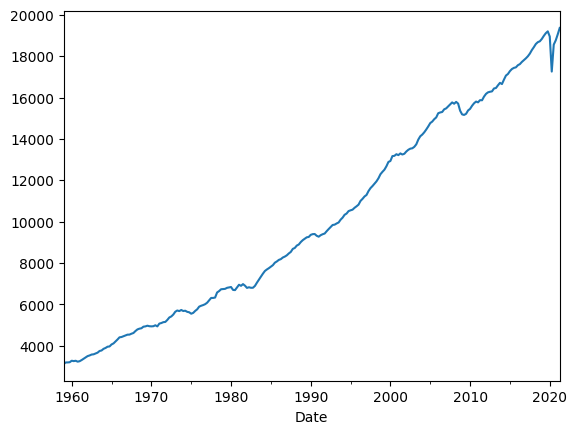

In [66]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
import math
from patsy import dmatrices

# load dataset
GDP_raw = read_csv(r"C:\Users\zhouq\OneDrive - Nanyang Technological University\FYP\Codes\FYP\quarter.txt", header = 0, sep = ",", index_col=0, parse_dates=True, dayfirst=True)
print(GDP_raw.size)

# plot dataset
GDP_raw['GDP'].plot()



Text(0.5, 1.0, 'dlog(GDP)')

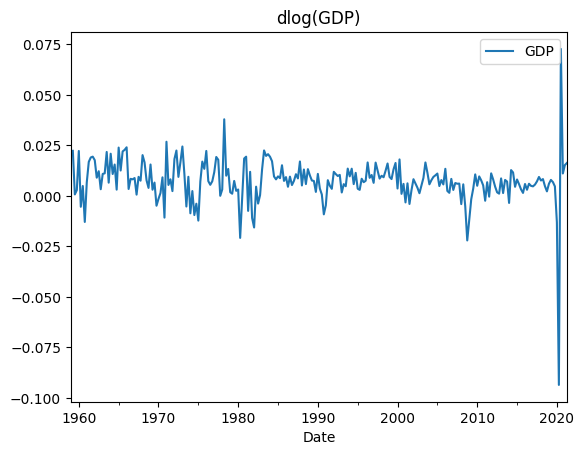

In [67]:
# transform data: take difference on log data
GDP_transform = pd.DataFrame(data=GDP_raw['GDP'].apply(lambda x: math.log(x)))
GDP_transform = GDP_transform.diff()
GDP_transform.plot()
plt.title("dlog(GDP)") 

In [83]:
model1 = AutoReg(X[1:250], lags=3)
res = model1.fit()
print(res.summary())

import statsmodels.api as sm
print(res.summary().as_latex())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  249
Model:                     AutoReg(3)   Log Likelihood                 757.746
Method:               Conditional MLE   S.D. of innovations              0.011
Date:                Mon, 15 Jan 2024   AIC                          -1505.493
Time:                        20:27:01   BIC                          -1487.966
Sample:                             3   HQIC                         -1498.436
                                  249                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0062      0.001      5.927      0.000       0.004       0.008
y.L1           0.0154      0.064      0.242      0.809      -0.110       0.140
y.L2           0.1099      0.063      1.733      0.0

Coefficients: [0.00446872 0.23690906 0.19277538]
predicted=-0.001779, expected=-0.001694
predicted=-0.000208, expected=0.003613
predicted=0.004077, expected=0.010623
predicted=0.005394, expected=0.004988
predicted=0.006533, expected=0.009631
predicted=0.007056, expected=0.007702
predicted=0.007400, expected=0.005182
predicted=0.007582, expected=-0.002412
predicted=0.007691, expected=0.006758
predicted=0.007753, expected=-0.000388
predicted=0.007788, expected=0.011154
predicted=0.007808, expected=0.008146
predicted=0.007820, expected=0.004548
predicted=0.007827, expected=0.001747
predicted=0.007830, expected=0.001098
predicted=0.007833, expected=0.008640
predicted=0.007834, expected=0.001393
predicted=0.007835, expected=0.007885
predicted=0.007835, expected=0.007087
predicted=0.007835, expected=-0.003507
predicted=0.007835, expected=0.012760
predicted=0.007835, expected=0.011582
predicted=0.007835, expected=0.004480
predicted=0.007835, expected=0.008100
predicted=0.007836, expected=0.00

C:\Users\zhouq\AppData\Local\Temp\ipykernel_22604\385667847.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (predictions[i], test[i]))


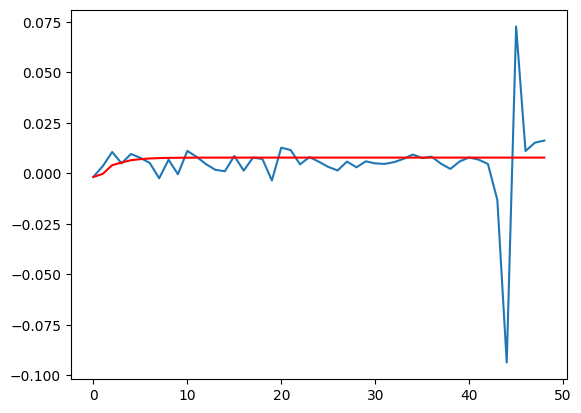

In [84]:
# split dataset
X = GDP_transform.values
train, test = X[1:200], X[201:]

# train autoregression
model = AutoReg(train, lags=2)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
 print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()